<a href="https://colab.research.google.com/github/IMPERIAL-xY/datascience-sachin-/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim:** Principal Component Analysis (PCA)


*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal
components.

*    Visualize the data in the reduced-dimensional space.








### 1\. Reducing Features Using Principal Components

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load the dataset
filename = 'Heart.csv'
df = pd.read_csv(filename)

# 2. Preprocessing
# Drop the "Unnamed: 0" column (it's just an ID) and "AHD" (the target/result)
# We use errors='ignore' so it won't crash if those columns aren't found
df = df.drop(columns=['Unnamed: 0', 'AHD'], errors='ignore')

# Select only numeric columns (Automatically drops 'ChestPain' and 'Thal')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values (Your file has some missing 'Ca' and 'Thal' values)
df_numeric = df_numeric.dropna()

print("Columns used for PCA:", list(df_numeric.columns))

# 3. Standardize the data
X = df_numeric.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA (Retain 99% of variance)
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

# 5. Output Results
print("-" * 30)
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

Columns used for PCA: ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']
------------------------------
Original number of features: 11
Reduced number of features: 11


### 2\. Reducing Features When Data Is Linearly Inseparable

In [ ]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('Heart.csv')

# 2. Select two numerical columns
# Replacing 'Open Price'/'Close Price' with 'RestBP' and 'Chol'
# We also drop missing values to prevent errors
features = df[['RestBP', 'Chol']].dropna().values

# 3. Standardize the data (Crucial for RBF Kernel)
# Without this, the 'gamma=15' parameter will cause the PCA to fail
# because values like 200 (Cholesterol) are too large for the formula.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. Apply Kernel PCA with rbf kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features_scaled)

# 5. Output
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


### 3\. Reducing Features by Maximizing Class Separability

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load dataset and drop missing values (LDA cannot handle missing data)
df = pd.read_csv('Heart.csv').dropna()

# Select features (X): Drop the target ('AHD'), ID ('Unnamed: 0'), and text columns
X = df.drop(['AHD', 'Unnamed: 0', 'ChestPain', 'Thal'], axis=1).values
y = df['AHD'].values

# Reduce to 1 feature maximizing class separability (Yes vs No)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

Original number of features: 11
Reduced number of features: 1
Explained variance ratio: [1.]


### 4. Visualize Data Before and After PCA

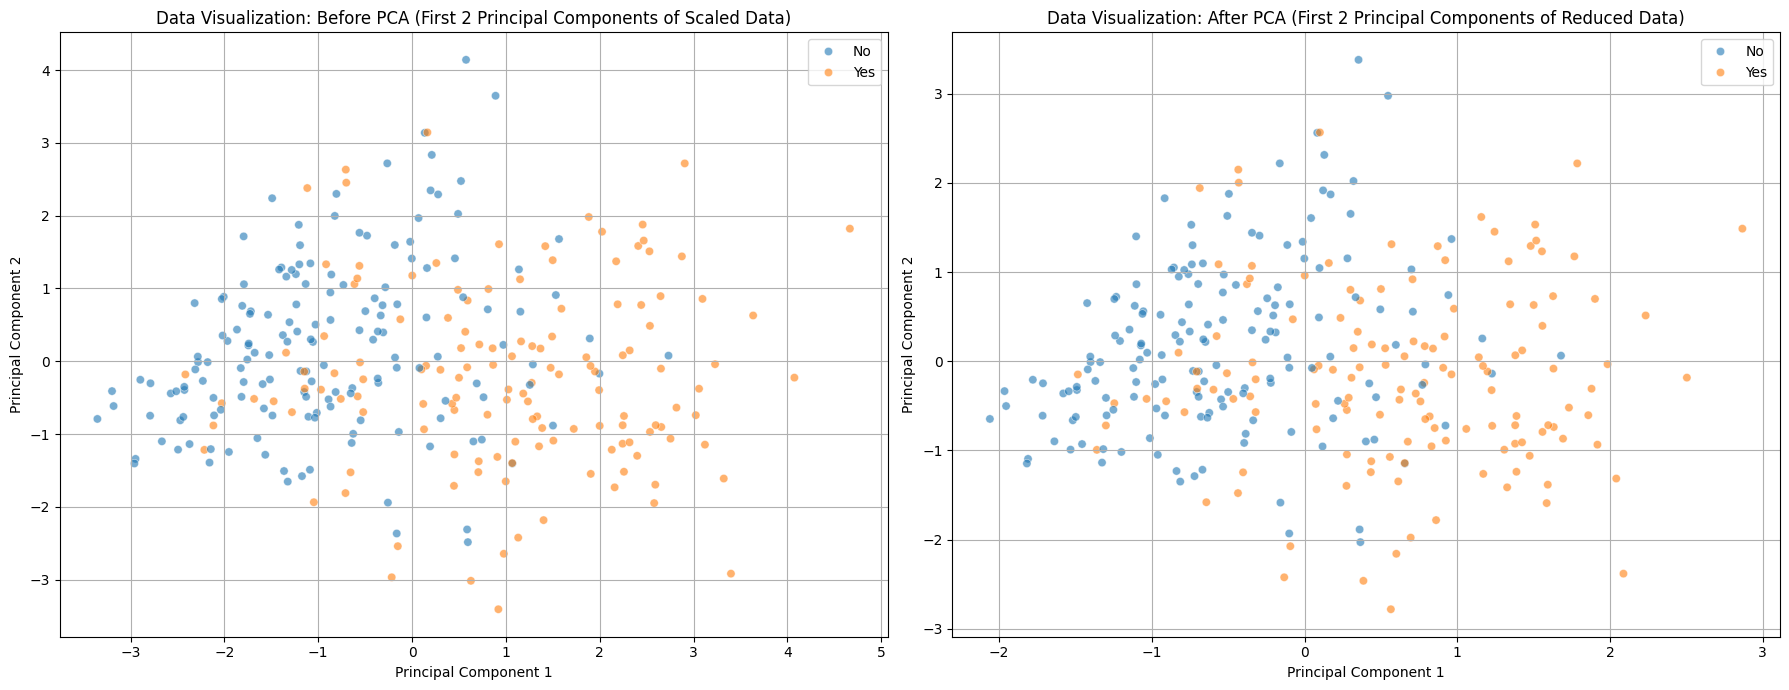

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Step 1: Prepare the Data (Same as before) ---
df = pd.read_csv('Heart.csv').dropna()

# Drop text/target columns to get just the numbers
X = df.drop(['AHD', 'Unnamed: 0', 'ChestPain', 'Thal'], axis=1).values
y = df['AHD'].values  # Target (Yes/No)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (99% variance)
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)


# --- Step 2: Your Visualization Code ---

# For 'Before PCA' visualization, project X_scaled onto 2 components for plotting
pca_2d_before = PCA(n_components=2)
X_scaled_2d = pca_2d_before.fit_transform(X_scaled)

# Create a figure with two subplots
plt.figure(figsize=(18, 7))

# First subplot: Before PCA
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_scaled_2d[:, 0],
    y=X_scaled_2d[:, 1],
    hue=y,   # <--- Added 'hue' so you can see the classes (Yes/No)
    alpha=0.6
)
plt.title('Data Visualization: Before PCA (First 2 Principal Components of Scaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Second subplot: After PCA
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,   # <--- Added 'hue' here as well
    alpha=0.6
)
plt.title('Data Visualization: After PCA (First 2 Principal Components of Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()